# Various simulations related to the signature and the randomized signature with sigmoid additions
## Notebook for introducing the sigmoid activation function
## Main notebook for simulating and testing

### Mechanism for Brownian Motion

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [110]:
from timeit import default_timer as timer

In [111]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigm_v = np.vectorize(sigmoid)

### Defining the functions to test later:

In [112]:
id_v = np.vectorize(lambda a : a)
g1 = id_v
sq_v =  np.vectorize(lambda a : a*a)
g2 = sq_v
cu_v =  np.vectorize(lambda a : a*a*a)
g3 = cu_v
quo_v =  np.vectorize(lambda a : 1/(1+abs(a)))
g4 = quo_v
sqrt_v = np.vectorize(math.sqrt)
log_v = np.vectorize(math.log)
sin_v = np.vectorize(math.sin)
g5 = sin_v 
cos_v = np.vectorize(math.cos)
arctan_v = np.vectorize(np.arctan)
g6 = arctan_v

In [113]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

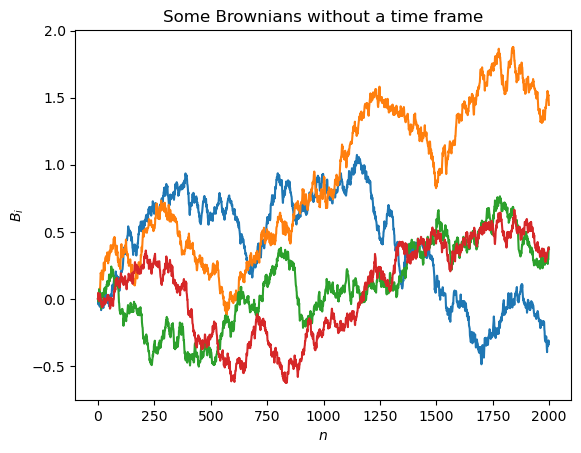

In [114]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [115]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [116]:
A, v

(array([[[-1.40720224, -0.50966595,  0.23728129,  1.07991748],
         [ 2.52546896, -2.6564908 ,  1.1568905 ,  1.53585524]],
 
        [[ 0.22334304, -0.22464074, -0.2682333 , -1.62732248],
         [-0.91391168, -1.00742179,  0.13386522, -0.80471551]],
 
        [[ 1.39777881,  0.2608093 ,  1.82257772,  0.76381253],
         [-0.0981356 , -0.70722422,  0.09584017, -0.79051651]]]),
 array([-0.21373066,  0.58482419,  0.15938574]))

### Time&step structure

In [117]:
N = 201
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

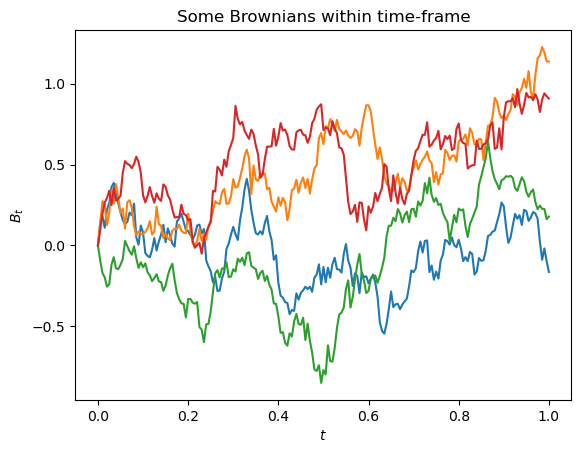

In [118]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(N))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Time&step structure

In [119]:
N = 1001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [120]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [121]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

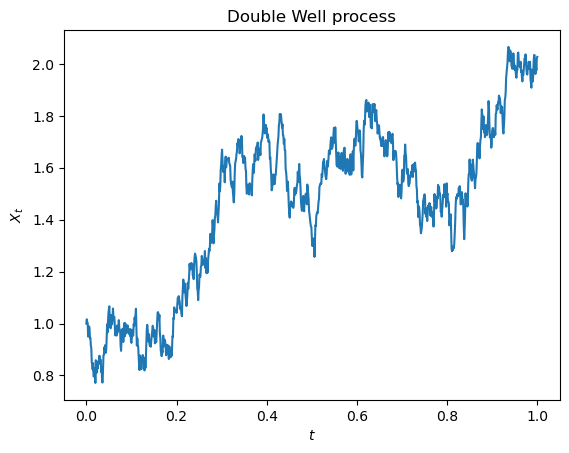

In [122]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$X_t$")
plt.show()

### Constructing the randomized signature

In [123]:
k = 30
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

##### With sigmoid

In [124]:
for i in range(N-1):
    Z[i+1] =   Z[i] + sigm_v(A@Z[i] + b)*dY[i] 

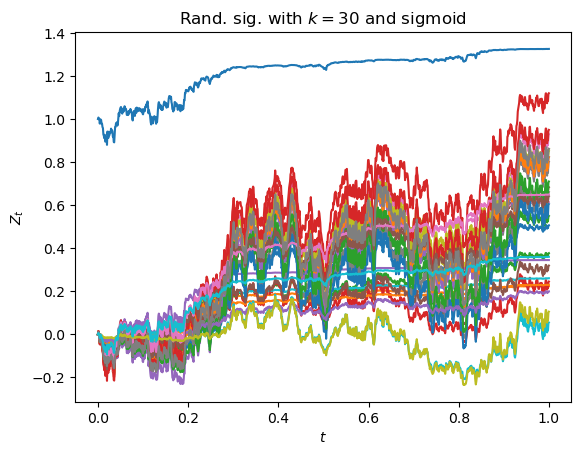

In [125]:
for i in range(30):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. sig. with $k = 30$ and sigmoid")
plt.xlabel("$t$")
plt.ylabel("$Z_t$")
plt.show()

### Training the linear, time-homogeneous readout for just one sample - without regularization

In [126]:
target_func = g1

In [127]:
target = target_func(Y)

In [128]:
model1 = LinearRegression().fit(Z, target)

In [129]:
r_sq_1 = model1.score(Z,target)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999999708742


In [130]:
print(f"intercept: {model1.intercept_}")

intercept: 0.8987620929609781


In [131]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.10123645  0.0876254  -0.09241114 -0.0041083   0.00569202 -0.10297168
  0.03010063  0.31881963  0.24223328  0.27874536 -0.01769756  0.27116868
  0.10263012  0.0128556  -0.02527013  0.04194201 -0.23250833 -0.20892724
 -0.15953944 -0.03614017  0.10179065  0.19375413  0.18572311  0.62989887
 -0.39224655 -0.29097882 -0.04525407  0.21859075  0.0258836   0.14119889]


In [132]:
Y_pred_1 = model1.predict(Z)

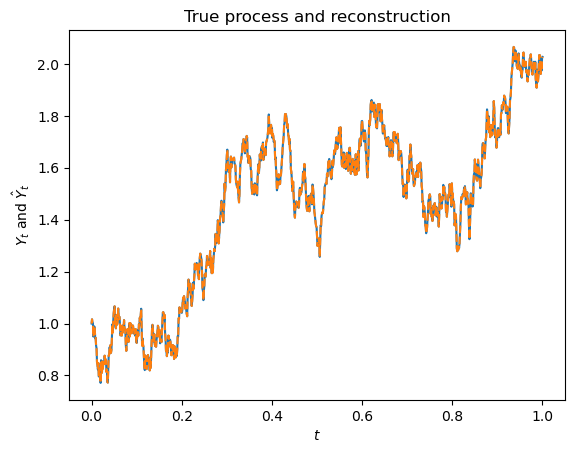

In [133]:
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians - $g_1$ to $g_6$

#### Set the target function:

In [134]:
target_func = g5

#### Set the training parameters:

In [135]:
n_sim = 200
k = 20
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
target_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(1001, 20)

In [136]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + sigm_v(A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z
    
    target = target_func(Y)
    target_big[iter*N:(iter+1)*N] = target

In [137]:
model3 = Ridge(alpha=0.01)
model3.fit(Z_big, target_big)

Ridge(alpha=0.01)

In [138]:
r_sq_3 = model3.score(Z_big, target_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.945395201495916


In [139]:
print(f"intercept: {model3.intercept_}")

intercept: 2.395110029013553


In [140]:
print(f"coefficients: {model3.coef_}")

coefficients: [ -1.67141434   3.70545742   6.42884545  -2.11521185   5.4565223
  -3.3371171   -1.57995774  -1.69989376   0.93387602  -1.9189223
   4.23922184 -14.85446073   0.45180553  -0.2666392   -1.72488992
   2.05573671  -0.7887062    2.20393685  -2.69987579  -5.48245927]


#### Set the testing parameters:

In [141]:
n_test = 100

In [142]:
error_list = []
for i_test in range(n_test):    
    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + sigm_v(A@Z[i] + b)*dY[i]
    target = target_func(Y)
    Y_pred_3 = model3.predict(Z)
    error_list.append(np.linalg.norm(target-Y_pred_3)/np.linalg.norm(target))

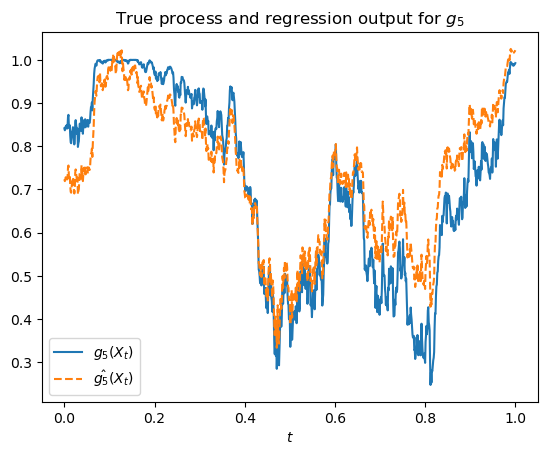

In [143]:
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and regression output for $g_5$")
plt.xlabel("$t$")
plt.gca().legend(('$g_5(X_t)$','$\hat{g_5}(X_t)$'))
plt.show()

### The average $L^2$ error

In [144]:
np.mean(error_list)

0.08425544067955608

## 4-Dimensional Ornstein–Uhlenbeck process

### Time&step structure

In [145]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [146]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0_4
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [147]:
br_4 = Brownian()

for i in range(4):
    brow_4[:,i] = br_4.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [148]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

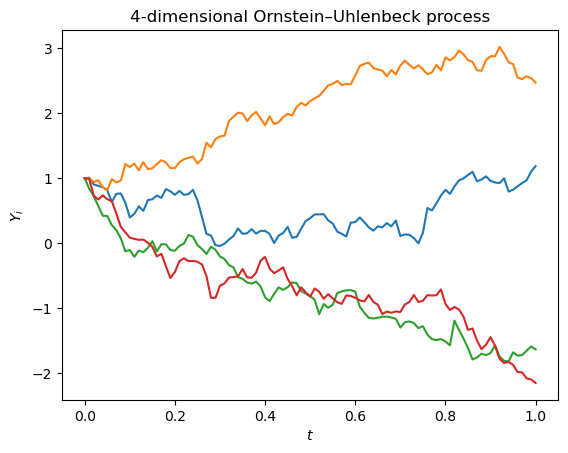

In [149]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [150]:
k_4 = 30
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

##### with sigmoid

In [151]:
for i in range(N-1):
    auxiliary = 0
    for j in range(4):
        auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
    Z_4[i+1] = Z_4[i] + auxiliary

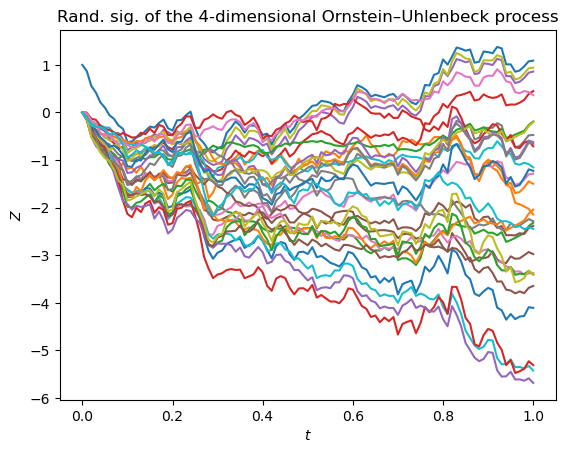

In [152]:
for i in range(k_4):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. sig. of the 4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### Defining the functions to test later:

In [153]:
def first_component(Y):
    return Y[:,0]

In [154]:
def second_component(Y):
    return Y[:,1]

In [155]:
def third_component(Y):
    return Y[:,2]

In [156]:
def fourth_component(Y):
    return Y[:,3]

In [157]:
def g7(Y):
    return first_component(Y)

In [158]:
def g8(Y):
    return second_component(Y) + third_component(Y)

In [159]:
def g9(Y):
    return np.multiply(first_component(Y), fourth_component(Y))

In [160]:
def g10(Y):
    return sin_v(np.multiply(third_component(Y), third_component(Y)))

In [161]:
def g11(Y):
    return np.multiply(first_component(Y), first_component(Y)) + np.multiply(np.multiply(third_component(Y), third_component(Y)), third_component(Y))

In [162]:
def g12(Y):
    return np.multiply(np.multiply(second_component(Y), second_component(Y)), cos_v(fourth_component(Y)))

### Training the linear, time-homogeneous readout for just one sample - without regularization (4-dimensional)

In [163]:
target_func = g12

In [164]:
target_4 = target_func(Y_4)

In [165]:
model5 = LinearRegression().fit(Z_4, target_4)

In [166]:
r_sq_5 = model5.score(Z_4,target_4)
print(f"coefficient of determination: {r_sq_5}")

coefficient of determination: 0.9983177984905864


In [167]:
print(f"intercept: {model5.intercept_}")

intercept: -1.5466929560548142


In [168]:
print(f"coefficients: {model5.coef_}")

coefficients: [ 2.09016687  5.99995989 -1.52296922  1.40080895  0.70361116  0.42823366
 -6.3560691  -1.24861868 -5.02077785 -3.10323515  3.21108413  0.51230099
  1.55243073 -1.29456659  1.54370387  1.18482619 -2.80580047 -4.73404246
  0.88657668 -6.01496811  4.44691729 -1.3141446   1.56205918  4.38897805
  3.02938941  0.96970356  0.68349216 -2.24843174 -2.26209335 -2.08816544]


In [169]:
Y_pred_5 = model5.predict(Z_4)

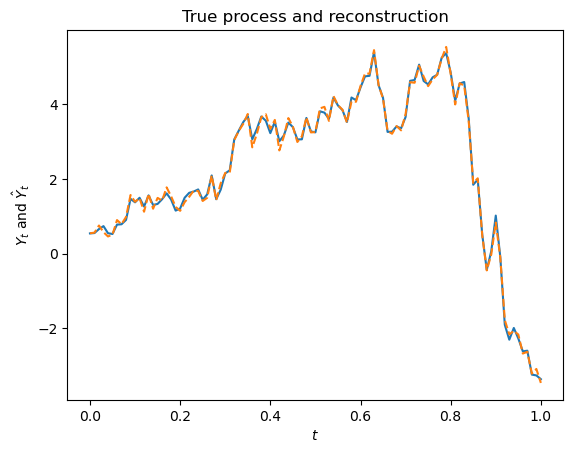

In [170]:
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_5, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians - $g_7$ to $g_{12}$

#### Set the target function:

In [171]:
target_func = g7

#### Set the training parameters:

In [172]:
n_sim_4 = 100
k_4 = 250
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
Y_big_4 = np.zeros((N*n_sim_4, 4))
target_big_4 = np.zeros(N*n_sim_4)
Z_big_4 = np.zeros((N*n_sim_4, k_4))
#Y_big_4[0:N,] = np.ones((N,4))
Y_big_4[0:N,].shape

(101, 4)

In [173]:
for iter in range(n_sim_4):
    
    Y_4 = np.zeros((N,4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N+1,4))
    
    
    br_4 = Brownian()

    for i in range(4):
        brow_4[:,i] = br_4.gen_normal(N+1)
    db_4 = np.diff(brow_4, axis = 0)
    
    for i in range(N-1):
        Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]
        
    dY_4 = np.diff(Y_4, axis = 0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1
    
    for i in range(N-1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
        Z_4[i+1] = Z_4[i] + auxiliary
        
        
        
        
    Y_big_4[iter*N:(iter+1)*N,:] = Y_4
    Z_big_4[iter*N:(iter+1)*N,:] = Z_4
    
    target_4 = target_func(Y_4)
    target_big_4[iter*N:(iter+1)*N] = target_4

In [174]:
model4 = Ridge(alpha=0.001)
model4.fit(Z_big_4, target_big_4)

Ridge(alpha=0.001)

In [175]:
r_sq_4 = model4.score(Z_big_4, target_big_4)
print(f"coefficient of determination: {r_sq_4}")

coefficient of determination: 0.9988896481720189


In [176]:
print(f"intercept: {model4.intercept_}")

intercept: 0.989971294211397


In [177]:
print(f"coefficients: {model4.coef_}")

coefficients: [ 2.14733480e-02  3.83929945e-02 -5.46323514e-03  1.13692360e-02
 -5.68945649e-03  8.64741582e-03  3.55057764e-03  5.55539529e-03
  5.81130160e-03 -1.41881864e-02  5.45469220e-03 -1.85961620e-02
 -2.91187185e-02  4.74584768e-02  1.58723980e-02  5.97303459e-03
 -4.99674830e-05 -1.27761086e-03 -8.03663179e-03 -1.21965053e-02
 -3.11948096e-03  1.28883641e-02  4.32562667e-03  3.00033650e-03
 -1.55170933e-02  2.05821481e-02  3.59299482e-03  2.68019392e-02
 -4.44983499e-02 -2.71199045e-02 -2.74788182e-02 -9.19627795e-03
  3.30018184e-03  1.97748210e-02  6.93036154e-03 -8.69441941e-03
 -2.60461247e-02  2.71062065e-02 -1.71430432e-02 -1.57255317e-02
  1.92745986e-02  2.32139310e-02 -1.62988580e-02 -3.64283861e-03
 -4.93621577e-03 -1.63585064e-02  1.28688065e-02  2.46149304e-02
 -3.32629272e-03 -1.29591456e-02  1.85049663e-01  4.74622068e-04
  2.21484830e-02  1.34811023e-02  2.48867421e-01  9.97879200e-03
 -2.22861915e-03 -1.08425499e-02 -1.20735710e-02 -5.01219924e-04
  2.7592352

#### Set the testing parameters:

In [178]:
n_test_4 = 100

In [179]:
error_list_4 = []
for iter_er_4 in range(n_test_4):    
    Y_4 = np.zeros((N,4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N+1,4))
        

    br_4 = Brownian()
    
    for i in range(4):
        brow_4[:,i] = br_4.gen_normal(N+1)
    db_4 = np.diff(brow_4, axis = 0)

    for i in range(N-1):
            Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]
        
    dY_4 = np.diff(Y_4, axis = 0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1
    
    for i in range(N-1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
        Z_4[i+1] = Z_4[i] + auxiliary
    target_4 = target_func(Y_4)
    Y_pred_4 = model4.predict(Z_4)
    error_list_4.append(np.linalg.norm(target_4-Y_pred_4)/np.linalg.norm(target_4))

### The average $L^2$ error

In [180]:
np.mean(error_list_4)

0.08072176207122331

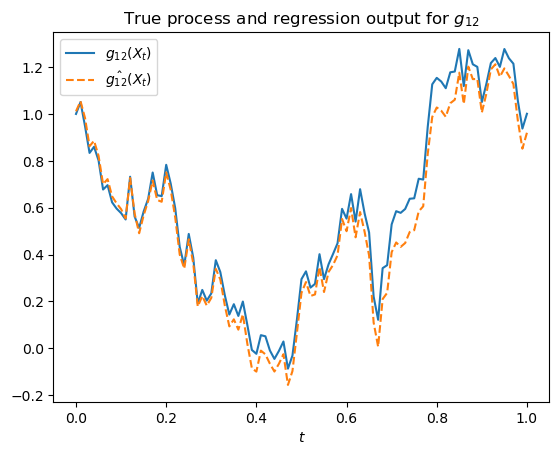

In [181]:
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_4, '--')
plt.title("True process and regression output for $g_{12}$")
plt.xlabel("$t$")
plt.gca().legend(('$g_{12}(X_t)$','$\hat{g_{12}}(X_t)$'))
plt.show()